In [18]:
# dataframe management
import pandas as pd             


# numerical computation
import numpy as np

from sklearn import preprocessing

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#in order to prin all the columns
pd.set_option('display.max_columns', 100)
from datetime import timedelta, date

In [2]:
#reading the datasets
bonifici = pd.read_csv("../datasets/quiubi_bonifici.csv")
segnalaz = pd.read_csv("../datasets/bonifici_segnalaz.csv")
bonifici.set_index('indice',inplace=True)
segnalaz.set_index('indice',inplace=True)

In [3]:
# dropping columns with useless data
bonifici = bonifici.drop(["CAP", "Servizio", "Status", "Paese", "Provincia", "Nazione", "IDTransazione", "CRO", "Causale", "Valuta", "ProfSicurezza", "NumConto", "ABI", "CAB", "Intestatario", "Indirizzo"], axis=1)
bonifici = bonifici.drop(["MsgErrore", "Nominativo", "TipoOperazione"], axis=1)
segnalaz = segnalaz.drop(["CAP", "Servizio", "Status", "Paese", "Provincia", "Nazione", "IDTransazione", "CRO", "Causale", "Valuta", "ProfSicurezza", "NumConto", "ABI", "CAB", "Intestatario", "Indirizzo"], axis=1)
segnalaz = segnalaz.drop(["MsgErrore", "Nominativo", "TipoOperazione"], axis=1)


In [4]:
# c'è un indice duplicato -> eliminalo
# NB: NON E' IL MODO MIGLIORE (GLI INDICI SONO DUPLICATI, MA LE TRANSAZIONI DIVERSE)
bonifici = bonifici[~bonifici.index.duplicated()]

In [5]:
# datasets merge into bonifici
bonifici["isFraud"] = np.zeros(len(bonifici.index))
for index, row in segnalaz.iterrows():
    if index in bonifici.index:
        bonifici.loc[index, "isFraud"] = 1
    else:
        # print(index)
        bonifici.append(row)

bonifici["isFraud"] = pd.to_numeric(bonifici["isFraud"], downcast='integer')

In [6]:
bonifici["isFraud"].value_counts()

0    482320
1       588
Name: isFraud, dtype: int64

# Min Preprocessing

In [6]:
bonifici.Timestamp = pd.to_datetime(bonifici.Timestamp)
bonifici.NumConfermaSMS = bonifici.NumConfermaSMS.eq('Si').astype(int)

In [7]:
bonifici["Importo"].to_numpy().reshape(-1, 1)

array([[1525. ],
       [4653.9],
       [ 600. ],
       ...,
       [ 500. ],
       [ 279.9],
       [ 488. ]])

In [8]:
x = bonifici[["Importo"]].to_numpy()
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
bonifici[["Importo"]] = x_scaled

In [8]:
bonifici = bonifici.reset_index(drop=True).groupby("UserID")

In [9]:
users = []
for user in bonifici.groups.keys():
    # order by time
    group = bonifici.get_group(user)
    if len(group[group["isFraud"] == 1]) > 5:
        print("user: ", user, " has: ", len(group), " transactions and ", group["isFraud"].sum(), "frauds.")
        users.append(user)

user:  0867f5f05526d3b084aa69e3676f2a4d  has:  51  transactions and  9 frauds.
user:  1442d67d8cdc87ca2ab07ce7de9029cf  has:  17  transactions and  7 frauds.
user:  19052aedb0bb8bceba3f678f385e1b6e  has:  15  transactions and  8 frauds.
user:  214a4bc5fdb7d209759e8d40be0d6567  has:  179  transactions and  15 frauds.
user:  247b5a9351d999d1e145b178e30f786f  has:  140  transactions and  19 frauds.
user:  30c6db7aa118baf6f7540b68c3ddc21a  has:  17  transactions and  6 frauds.
user:  38d26e321ed16701083664e2c2d05a6a  has:  49  transactions and  7 frauds.
user:  3a7022620139a886d4cccc26c71d9239  has:  29  transactions and  14 frauds.
user:  487aafc12721a790fee4ea0a5d116e43  has:  26  transactions and  7 frauds.
user:  5090d42c2bf5ec1bfbab29d7cb65e31d  has:  54  transactions and  13 frauds.
user:  5781896dec67da023ab6882aff02d8c7  has:  36  transactions and  27 frauds.
user:  57ccad30e823d12b5bdb8badd3712ece  has:  147  transactions and  120 frauds.
user:  60b234fe5110937c1821e87e92b87a4b  h

User:  0867f5f05526d3b084aa69e3676f2a4d


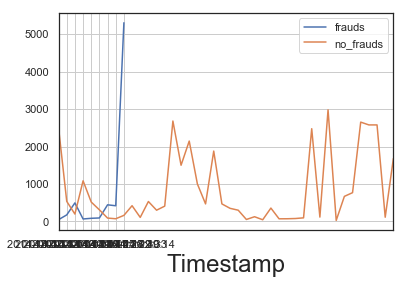

User:  1442d67d8cdc87ca2ab07ce7de9029cf


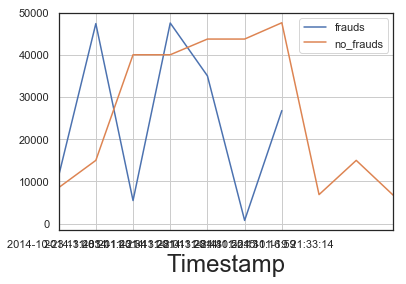

User:  19052aedb0bb8bceba3f678f385e1b6e


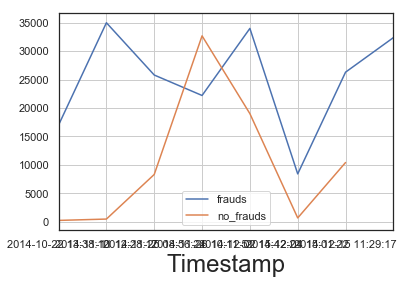

User:  214a4bc5fdb7d209759e8d40be0d6567


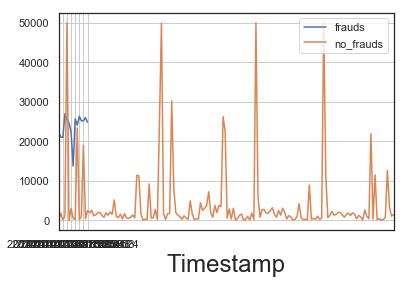

User:  247b5a9351d999d1e145b178e30f786f


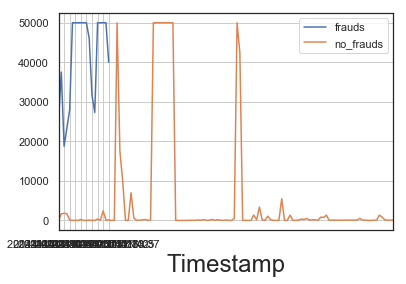

User:  30c6db7aa118baf6f7540b68c3ddc21a


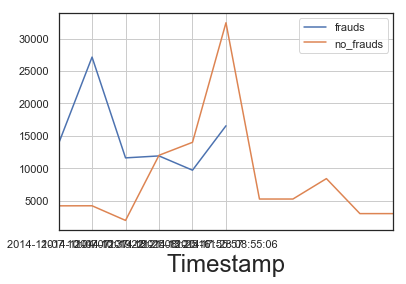

User:  38d26e321ed16701083664e2c2d05a6a


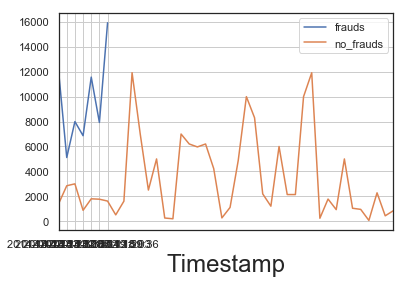

User:  3a7022620139a886d4cccc26c71d9239


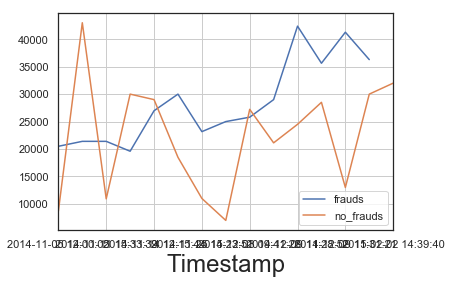

User:  487aafc12721a790fee4ea0a5d116e43


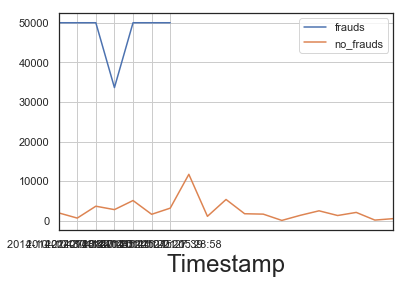

User:  5090d42c2bf5ec1bfbab29d7cb65e31d


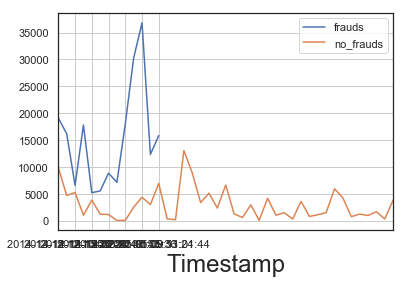

User:  5781896dec67da023ab6882aff02d8c7


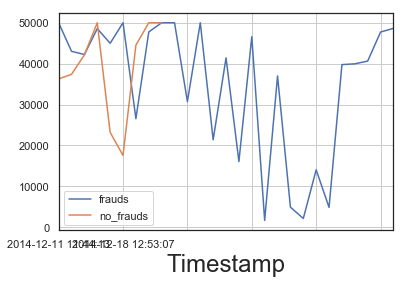

User:  57ccad30e823d12b5bdb8badd3712ece


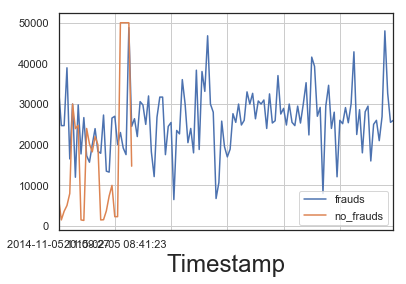

User:  60b234fe5110937c1821e87e92b87a4b


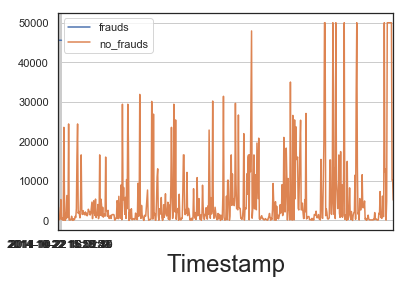

User:  7747903ef3db8e480db4aaa22106aeeb


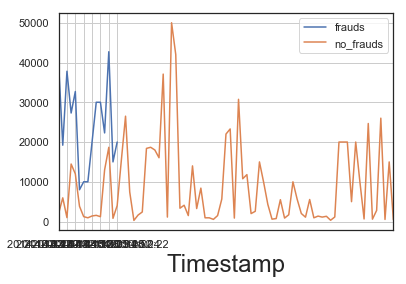

User:  7a2c9db3b10b5bd6afc53a7b454e9912


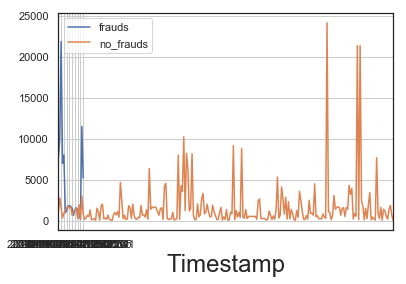

User:  82fd8616da459f115d10ae764cd1fa47


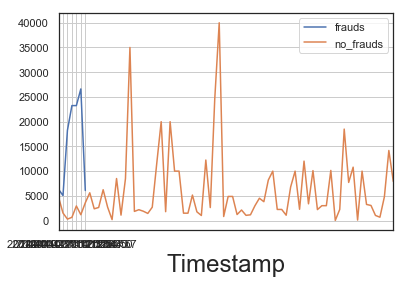

User:  95032ec50a4b20625ad0f11e3224f88d


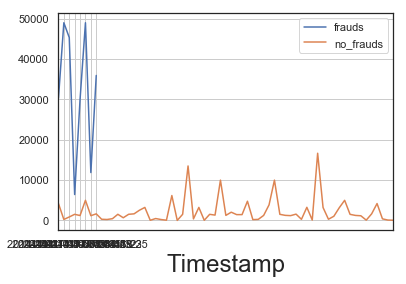

User:  9b56beefd4757caa5b0ab1717f5362b8


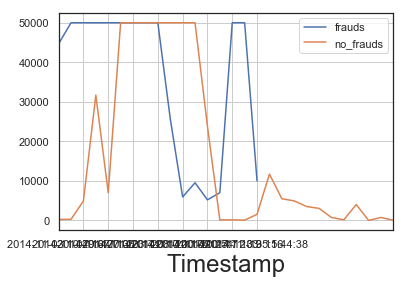

User:  9f8083d7355e1a331f763da50a4d3f53


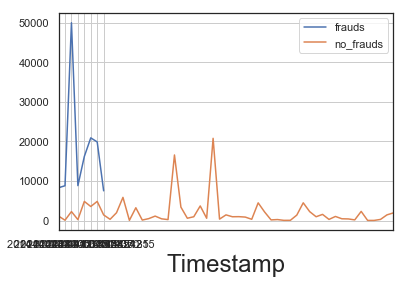

User:  a29ff8408221ff71c60064fde7df6225


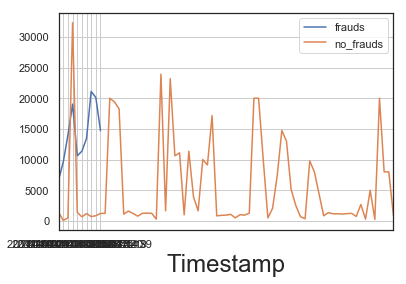

User:  ab98a2c006e9de1a7b02a90bddf006f9


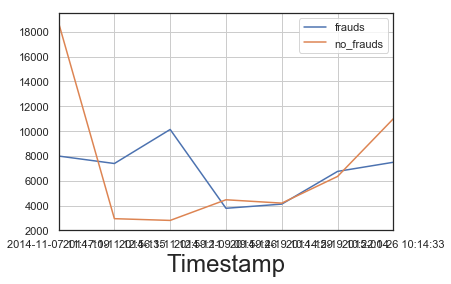

User:  ae28870483eeda5939501afdb7162723


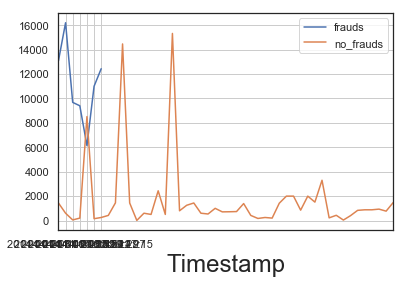

User:  b87511cfc169b0b4a0454adc1d9ab91a


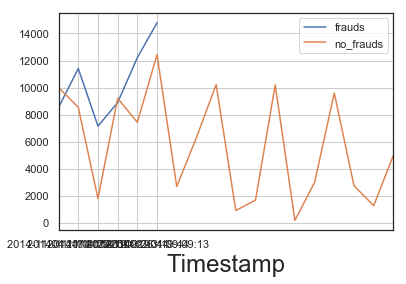

User:  bc716423a427f3c725f73fa7456f0d52


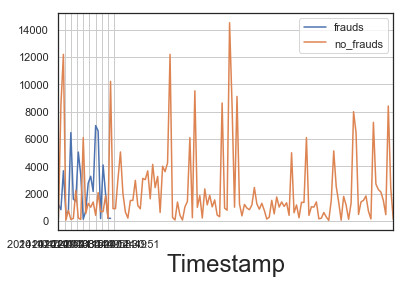

User:  bd83c9ab19954f8d65064ee9aa7b2034


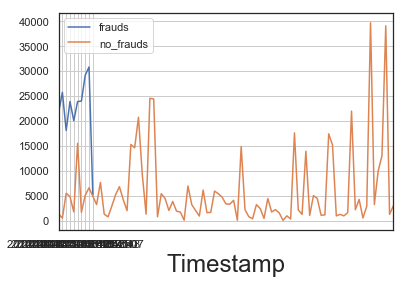

User:  e372e3e6e59f522754366dcd1830c047


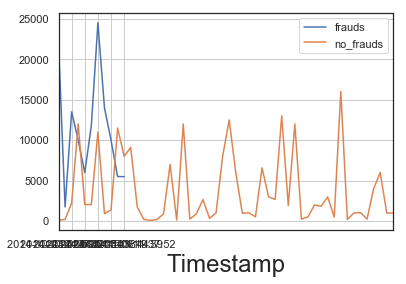

User:  e9b520399bc01ad98d1d79ea25239ef5


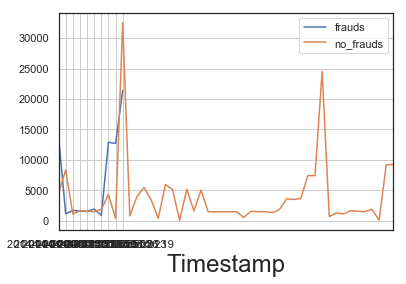

User:  f4c33aa6943784d70113b9a42864c1c8


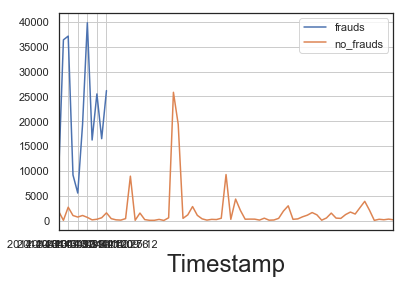

User:  f4d897ee15afff881abea4545a605609


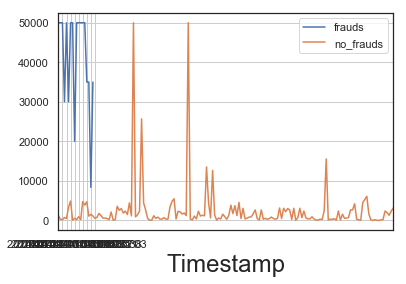

In [50]:
for user in users:
    print("User: ", user)
    specific_user = bonifici.get_group(user).sort_values(by="Timestamp")
    specific_user = specific_user.set_index(specific_user.Timestamp, drop=True)
    specific_user_no_frauds = specific_user[specific_user["isFraud"] == 0]
    specific_user_frauds = specific_user[specific_user["isFraud"] == 1]
    specific_user_frauds.Importo.plot(grid=True, label="frauds", legend=True)
    specific_user_no_frauds.Importo.plot(grid=True, label="no_frauds", legend=True)
    plt.show()

In [52]:
bonifici.get_group("19052aedb0bb8bceba3f678f385e1b6e")[bonifici.get_group("19052aedb0bb8bceba3f678f385e1b6e").isFraud == 1]

,IP,IDSessione,Timestamp,Importo,DataValuta,DataEsecuzione,UserID,IBAN,NumConfermaSMS,IBAN_CC,CC_ASN,isFraud
291063,9773844fef76babb48a8f20c581f1472,126d66caeb6bdca0dc45b8cd773bad5e,2014-11-12 12:28:49,8400.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,83a6e6be14772048f137035e89dd5621,Si,NL,"IT,AS30722",1
291064,9773844fef76babb48a8f20c581f1472,12b7e5519ff542b6fd55d4634c906a18,2014-10-28 14:11:09,35000.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,83a6e6be14772048f137035e89dd5621,Si,NL,"IT,AS30722",1
291065,9773844fef76babb48a8f20c581f1472,163be177422193e8a7e22721dc94d608,2014-11-11 12:33:06,34000.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,83a6e6be14772048f137035e89dd5621,Si,NL,"IT,AS30722",1
291069,9773844fef76babb48a8f20c581f1472,6106c35ac42a23b8638bff38a4ef1363,2014-10-27 15:04:20,17000.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,83a6e6be14772048f137035e89dd5621,Si,NL,"IT,AS30722",1
291071,9773844fef76babb48a8f20c581f1472,71729a84e1766c6bd4a73dbfa2cab871,2014-11-19 10:43:34,32380.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,83a6e6be14772048f137035e89dd5621,Si,NL,"IT,AS30722",1
291072,9773844fef76babb48a8f20c581f1472,bb54a3ce49d4901e0c18f0fbc95ef96a,2014-11-04 12:19:10,25800.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,83a6e6be14772048f137035e89dd5621,Si,NL,"IT,AS30722",1
291074,9773844fef76babb48a8f20c581f1472,c82de911120ca94d39fc5fda58939c43,2014-11-05 10:15:00,22200.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,83a6e6be14772048f137035e89dd5621,Si,NL,"IT,AS30722",1
291075,9773844fef76babb48a8f20c581f1472,ded7754977a86ac71324a399e944619b,2014-11-18 10:49:57,26300.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,83a6e6be14772048f137035e89dd5621,Si,NL,"IT,AS30722",1


In [53]:
bonifici.get_group("19052aedb0bb8bceba3f678f385e1b6e")[bonifici.get_group("19052aedb0bb8bceba3f678f385e1b6e").isFraud == 0]

,IP,IDSessione,Timestamp,Importo,DataValuta,DataEsecuzione,UserID,IBAN,NumConfermaSMS,IBAN_CC,CC_ASN,isFraud
291066,9773844fef76babb48a8f20c581f1472,178653c1ea656f5d8bb5805e21c2ae45,2014-11-25 08:56:24,8300.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,83a6e6be14772048f137035e89dd5621,Si,NL,"IT,AS30722",0
291067,9773844fef76babb48a8f20c581f1472,2a8024a52ffcd40750fce50b49b297ef,2014-10-22 13:38:10,212.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,e61c735b0d240b3cb92ef02bdcb99891,Si,NL,"IT,AS30722",0
291068,9773844fef76babb48a8f20c581f1472,391a6ed07bdd5b39617fa697931522e7,2014-12-04 15:01:22,650.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,5b6396f8e0365b1b3d8b87e012152e3a,Si,RO,"IT,AS30722",0
291070,9773844fef76babb48a8f20c581f1472,636ec01abf27d403c45a0479c2b0c9c3,2014-12-15 11:29:17,10400.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,5b6396f8e0365b1b3d8b87e012152e3a,Si,RO,"IT,AS30722",0
291073,9773844fef76babb48a8f20c581f1472,c2cfd68c2b00f66000d643de572b46cf,2014-12-02 15:42:21,19000.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,284308010a408bbbfb835e921fbfbf37,Si,IT,"IT,AS30722",0
291076,9773844fef76babb48a8f20c581f1472,f6442ffbd75c3dca6b9641e1308c2b3d,2014-11-26 10:11:51,32694.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,83a6e6be14772048f137035e89dd5621,Si,NL,"IT,AS30722",0
291077,9773844fef76babb48a8f20c581f1472,ffda5016a271467d7a9fd1e34ddb2e74,2014-11-11 12:28:17,450.0,0000-00-00 00:00:00,0000-00-00 00:00:00,19052aedb0bb8bceba3f678f385e1b6e,5b6396f8e0365b1b3d8b87e012152e3a,Si,RO,"IT,AS30722",0
